In [1]:
# Import Libraries
!pip install textblob  
from textblob  import TextBlob
import sys
!pip install tweepy
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
!pip install pycountry
import pycountry
import re
import string
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install langdetect
from langdetect import detect
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Authentication
consumerKey = 'kq5euokIcLtDQRWrY4CJRvFIX'
consumerSecret = 'eIcRvP3cFF5n2k0m6dRviiv9mdSJSdw5N6gdXE2ckRxC94hEtF'
accessToken = '1060847538918457349-Q9QlLGPEYw58GfhcrfZe8gOIf5h63L'
accessTokenSecret = '3JbAqu77u8W0YxhE8GGDZUWlXCY4JUypEvlmq2YmltTAH'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)
user = api.me()
print (user.name)

Abinesh Vel


In [3]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [ ]:
#Input and Sentiment Analysis
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword, lang='en').items(noOfTweet) 
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
keyword1 = input('Please enter keyword or hashtag to search: ')
noOfTweet1 = int(input ('Please enter how many tweets to analyze: '))
tweets1 = tweepy.Cursor(api.search, q=keyword1,lang='en').items(noOfTweet1) 
positive1 = 0
negative1 = 0
neutral1 = 0
polarity1 = 0
tweet_list1 = []
neutral_list1 = []
negative_list1 = []
positive_list1 = []
for tweet in tweets1:
    tweet_list1.append(tweet.text)
    analysis1 = TextBlob(tweet.text)
    score1 = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg1 = score1['neg']
    neu1 = score1['neu']
    pos1 = score1['pos']
    comp1 = score1['compound']
    polarity1 += analysis1.sentiment.polarity
    if neg1 > pos1:
        negative_list1.append(tweet.text)
        negative1 += 1
    elif pos1 > neg1:
        positive_list1.append(tweet.text)
        positive1 += 1
    elif pos1 == neg1:
        neutral_list1.append(tweet.text)
        neutral1 += 1
        
positive1 = percentage(positive1, noOfTweet1)
negative1 = percentage(negative1, noOfTweet1)
neutral1 = percentage(neutral1, noOfTweet1)
polarity1 = percentage(polarity1, noOfTweet1)
positive1 = format(positive1, '.1f')
negative1 = format(negative1, '.1f')
neutral1 = format(neutral1, '.1f')

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('Sentiment count for: ',keyword)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

Sentiment count for:  mkstalin
total number:  1500
positive number:  652
negative number:  149
neutral number:  699


In [7]:
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list1 = pd.DataFrame(neutral_list1)
negative_list1 = pd.DataFrame(negative_list1)
positive_list1 = pd.DataFrame(positive_list1)
print('Sentiment count for: ',keyword1)
print('total number: ',len(tweet_list1))
print('positive number: ',len(positive_list1))
print('negative number: ', len(negative_list1))
print('neutral number: ',len(neutral_list1))

Sentiment count for:  EPSTamilNadu
total number:  1500
positive number:  835
negative number:  389
neutral number:  276


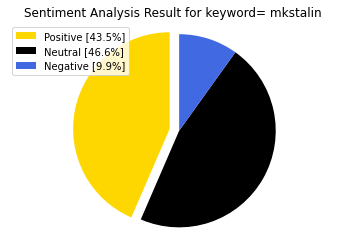

In [8]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['gold', 'black','royalblue']
my_explode=(0.1,0,0)
patches, texts = plt.pie(sizes,colors=colors,explode=my_explode, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+' ' )
plt.axis('equal')
plt.show()

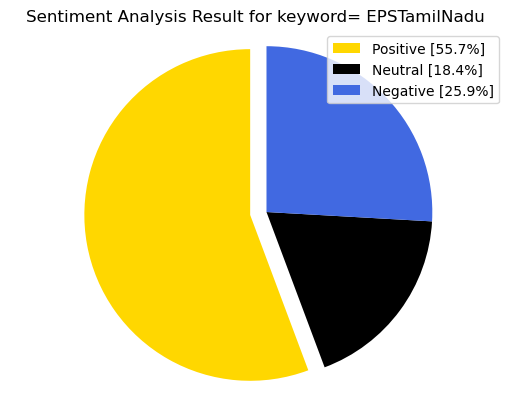

In [9]:
labels = ['Positive ['+str(positive1)+'%]' , 'Neutral ['+str(neutral1)+'%]','Negative ['+str(negative1)+'%]']
sizes = [positive1, neutral1, negative1]
colors = ['gold', 'black','royalblue']
my_explode = (0.1,0,0)
patches, texts = plt.pie(sizes,colors=colors,explode=my_explode, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword1+' ' )
plt.axis('equal')
plt.show()

In [10]:
print(len(tweet_list))
print(len(tweet_list1))

1500
1500


In [11]:
tweet_list.drop_duplicates(inplace = True)
tweet_list1.drop_duplicates(inplace = True)

In [12]:
print(len(tweet_list))
print(len(tweet_list1))

440
600


In [13]:
np.random.seed(10)
if(len(tweet_list1) > len(tweet_list)):
    remove_n = len(tweet_list1) - len(tweet_list);
    drop_indices = np.random.choice(tweet_list1.index,remove_n,replace=False)
    tweet_list1 = tweet_list1.drop(drop_indices)
elif(len(tweet_list1) < len(tweet_list)):
    remove_n = len(tweet_list) - len(tweet_list);
    drop_indices = np.random.choice(tweet_list.index, remove_n, replace=False)
    tweet_list = tweet_list.drop(drop_indices)
else:
    remove_n = 0;

print(tweet_list.shape)
print(tweet_list1.shape)

(440, 1)
(440, 1)


In [14]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Timepassna: After known #WeStandWithStalin...,after known westandwithstalin in st place ...
1,RT @jothims: Dear BJP friends who are are tren...,dear bjp friends who are are trending goback...
2,RT @isai_: Show us a Chief Minister as dedicat...,show us a chief minister as dedicated as thir...
4,RT @Agamudaiyar_: First chief minister in Indi...,first chief minister in india to wear ppe and...
5,@DhatchnaMaveri2 @mkstalin @Udhaystalin @ptrma...,voice of people socialist - we...
6,@IlovemyNOAH2019 @mkstalin #we stand with stal...,9 we stand with stalin
7,RT @143blueredblack: #Welcome_TNCM_Stalin\n#Go...,welcome tncm stalin gobackstalin mkstalin...
8,"RT @tholar404: For the first time in India, a ...",for the first time in india a cm is visiting...
9,RT @Rajesh43243703: Hats off sir..\n@mkstalin ...,hats off sir cbewelcomesstakin welcom...
10,RT @a2studoffl: This is the first time in the ...,this is the first time in the country that a ...


In [15]:
tw_list1 = pd.DataFrame(tweet_list1)
tw_list1["text"] = tw_list1[0]
tw_list1["text"] = tw_list1.text.map(remove_rt).map(rt)
tw_list1["text"] = tw_list1.text.str.lower()
tw_list1.head(10)

,0,text
0,@KartiPC @EPSTamilNadu @AIADMKOfficial Meanwhi...,meanwhile our cm is losing his people s ...
2,RT @KartiPC: VK Sasikala Hints at Return to Po...,vk sasikala hints at return to politics in vi...
3,VK Sasikala Hints at Return to Politics in Vir...,vk sasikala hints at return to politics in vir...
4,@mouli_dorai @mohanveeramuthu @EPSTamilNadu @n...,dorai sir besides all these thing...
5,@Vishwajeetrao_ @mohanveeramuthu @EPSTamilNadu...,but further allotment wasn t
9,@Vishwajeetrao_ @mohanveeramuthu @EPSTamilNadu...,as i can understand through t
11,@mouli_dorai @mohanveeramuthu @EPSTamilNadu @n...,dorai that is exactly why maharash...
12,RT @mouli_dorai: @Vishwajeetrao_ @mohanveeramu...,instead of blaming try to under...
13,RT @Vishwajeetrao_: @mouli_dorai @mohanveeramu...,dorai both chennai and coimbator...
17,RT @VVeeraprabha: The government should impose...,the government should impose the death penalt...


In [16]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Timepassna: After known #WeStandWithStalin...,after known westandwithstalin in st place ...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @jothims: Dear BJP friends who are are tren...,dear bjp friends who are are trending goback...,0.00,0.000000,positive,0.000,0.750,0.250,0.7184
2,RT @isai_: Show us a Chief Minister as dedicat...,show us a chief minister as dedicated as thir...,0.10,0.100000,positive,0.000,0.811,0.189,0.4939
4,RT @Agamudaiyar_: First chief minister in Indi...,first chief minister in india to wear ppe and...,0.25,0.333333,neutral,0.000,1.000,0.000,0.0000
5,@DhatchnaMaveri2 @mkstalin @Udhaystalin @ptrma...,voice of people socialist - we...,0.00,0.000000,positive,0.000,0.704,0.296,0.2732
6,@IlovemyNOAH2019 @mkstalin #we stand with stal...,9 we stand with stalin,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @143blueredblack: #Welcome_TNCM_Stalin\n#Go...,welcome tncm stalin gobackstalin mkstalin...,0.15,0.600000,positive,0.157,0.674,0.169,0.0516
8,"RT @tholar404: For the first time in India, a ...",for the first time in india a cm is visiting...,0.25,0.333333,neutral,0.000,1.000,0.000,0.0000
9,RT @Rajesh43243703: Hats off sir..\n@mkstalin ...,hats off sir cbewelcomesstakin welcom...,0.80,0.900000,positive,0.000,0.700,0.300,0.4588
10,RT @a2studoffl: This is the first time in the ...,this is the first time in the country that a ...,0.25,0.333333,neutral,0.000,1.000,0.000,0.0000


In [17]:
tw_list1[['polarity', 'subjectivity']] = tw_list1['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list1['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list1.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list1.loc[index, 'sentiment'] = "positive"
    else:
        tw_list1.loc[index, 'sentiment'] = "neutral"
    tw_list1.loc[index, 'neg'] = neg
    tw_list1.loc[index, 'neu'] = neu
    tw_list1.loc[index, 'pos'] = pos
    tw_list1.loc[index, 'compound'] = comp
tw_list1.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@KartiPC @EPSTamilNadu @AIADMKOfficial Meanwhi...,meanwhile our cm is losing his people s ...,0.00,0.00,positive,0.202,0.543,0.256,0.1779
2,RT @KartiPC: VK Sasikala Hints at Return to Po...,vk sasikala hints at return to politics in vi...,0.00,1.00,positive,0.000,0.812,0.188,0.4019
3,VK Sasikala Hints at Return to Politics in Vir...,vk sasikala hints at return to politics in vir...,0.00,1.00,positive,0.000,0.852,0.148,0.3818
4,@mouli_dorai @mohanveeramuthu @EPSTamilNadu @n...,dorai sir besides all these thing...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
5,@Vishwajeetrao_ @mohanveeramuthu @EPSTamilNadu...,but further allotment wasn t,0.00,0.50,neutral,0.000,1.000,0.000,0.0000
9,@Vishwajeetrao_ @mohanveeramuthu @EPSTamilNadu...,as i can understand through t,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
11,@mouli_dorai @mohanveeramuthu @EPSTamilNadu @n...,dorai that is exactly why maharash...,0.25,0.25,neutral,0.000,1.000,0.000,0.0000
12,RT @mouli_dorai: @Vishwajeetrao_ @mohanveeramu...,instead of blaming try to under...,0.00,0.00,negative,0.390,0.610,0.000,-0.4939
13,RT @Vishwajeetrao_: @mouli_dorai @mohanveeramu...,dorai both chennai and coimbator...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
17,RT @VVeeraprabha: The government should impose...,the government should impose the death penalt...,0.00,0.00,negative,0.408,0.505,0.087,-0.8360


In [18]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]


tw_list_negative1 = tw_list1[tw_list1["sentiment"]=="negative"]
tw_list_positive1 = tw_list1[tw_list1["sentiment"]=="positive"]
tw_list_neutra1l = tw_list1[tw_list1["sentiment"]=="neutral"]

In [19]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
print(count_values_in_column(tw_list,"sentiment"))
print(count_values_in_column(tw_list1,"sentiment"))

          Total  Percentage
positive    223       50.68
neutral     156       35.45
negative     61       13.86
          Total  Percentage
positive    204       46.36
neutral     154       35.00
negative     82       18.64


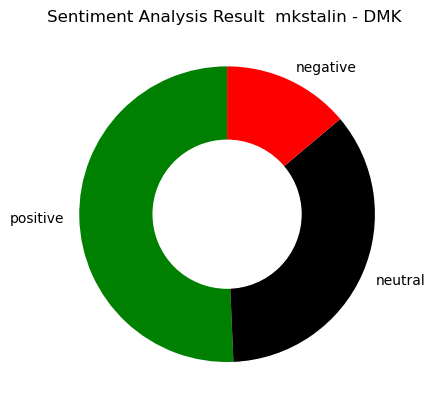

In [20]:
import matplotlib.pyplot as plt
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc['Percentage']

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
my_explode = (0, 0.1)
#piechart specifications
plt.pie(size, labels=names, colors=['green','Black','Red'],startangle = 90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result  '+keyword+' - DMK ' )
plt.show()

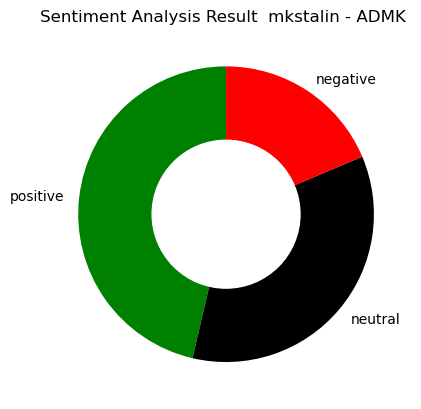

In [22]:
import matplotlib.pyplot as plt
# create data for Pie Chart
pc = count_values_in_column(tw_list1,"sentiment")
names= pc.index
size=pc['Percentage']

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
my_explode = (0, 0.1)
#piechart specifications
plt.pie(size, labels=names, colors=['green','Black','Red'],startangle = 90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result  '+keyword+' - ADMK ' )
plt.show()

In [26]:
def create_wordcloud(text):
 mask = np.array(Image.open("cloud1.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=25,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


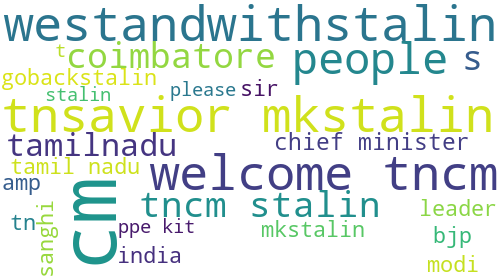

In [27]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


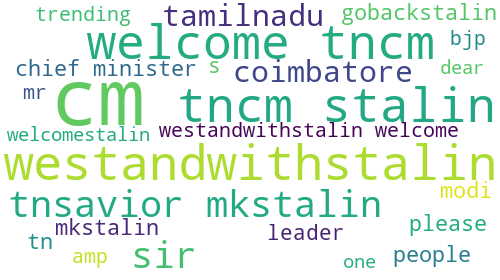

In [28]:
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


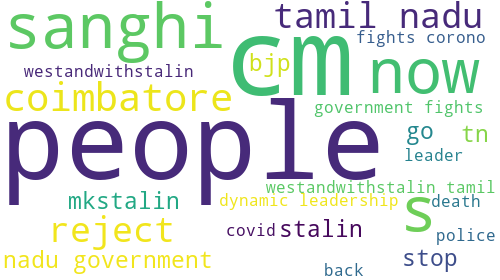

In [29]:
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


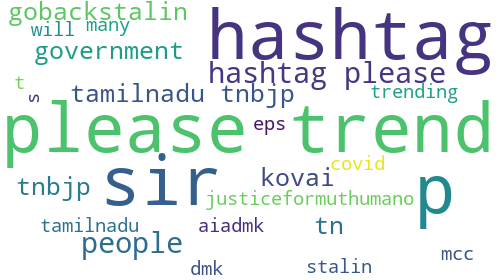

In [30]:
create_wordcloud(tw_list1["text"].values)

Word Cloud Saved Successfully


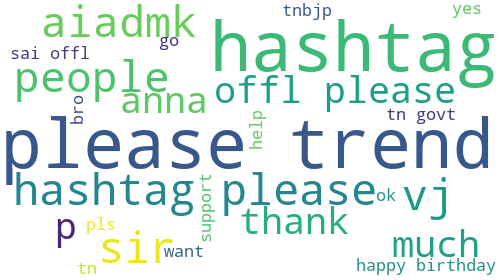

In [31]:
create_wordcloud(tw_list_positive1["text"].values)

Word Cloud Saved Successfully


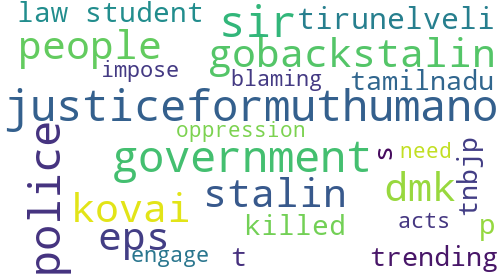

In [32]:
create_wordcloud(tw_list_negative1["text"].values)

In [33]:
tw_list_positive.text.count()

223

In [34]:
tw_list_positive1.text.count()

204

In [39]:
tw_list_negative.text.count()

61

In [40]:
tw_list_negative1.text.count()

82

In [35]:
a = tw_list_positive.text.count()
b = tw_list_positive1.text.count()

a1 = tw_list_negative.text.count()
b1 = tw_list_negative1.text.count()

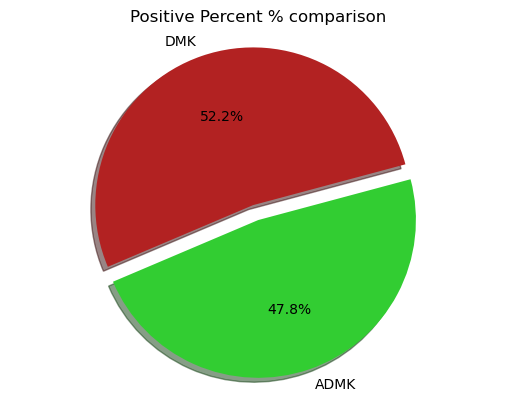

In [41]:
scores = [a,b]

my_labels = 'DMK','ADMK'
my_colors = ['firebrick','limegreen']
my_explode = (0, 0.1)
plt.pie(scores, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Positive Percent % comparison')
plt.axis('equal')
plt.show()

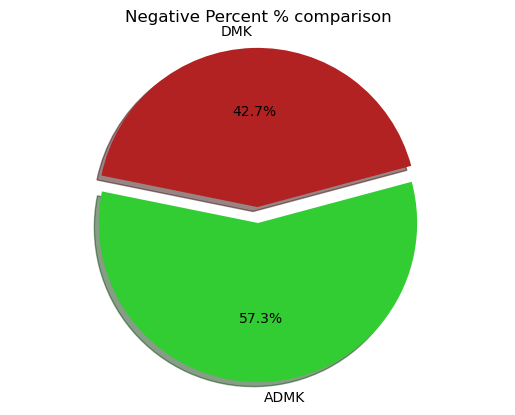

In [42]:
scores = [a1,b1]

my_labels = 'DMK','ADMK'
my_colors = ['firebrick','limegreen']
my_explode = (0, 0.1)
plt.pie(scores, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Negative Percent % comparison')
plt.axis('equal')
plt.show()